# Mid-Ratio Histogram Test

In this section, we take a closer look at the authors' mid ratio test. They look at the ordered triplet (a,b,c); a < b < c and plot the ratio of (b-a)/(c-a) and show an anomaly for the particular RTS. We will conduct the following tests:

To Do - Various plots that we will plot in this section

- First, try to reproduce what the authors did. Figure (1)

- Second, we pool in all the data and try to test for anomalous patterns by singling out each individual from the pool and plotting it compared to the rest of them put together excluding/including the individual?

- Third, we do a permutation test, by making random draws of N_RTS samples from the pooled data (all users) and calibrating the empirical distribution of mid ratio in such a random draw, and then testing for the surprising behavior of the "RTS"'s test statistic.

In [270]:
# import numpy and matlab plot library

import numpy as np

# VERY IMPORTANT line
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt

# import panda
import pandas as pd

In [295]:
# This function removes NA values from the dataframe and converts it to a matrix, and returns only last 3 columns.
# FOr the rest data, there is an extra column indexing the person, which we ignore for our computations of mid-ratios.
def process(df):    
    data = df.dropna(axis = 0)
    data = data.as_matrix()
    return data[:,-3:]

# This function simply plots a histogram of the data (named ratio) with a given title and displays it inline.
def plot_np_hist(ratio, s='Title', show=False):
    plt.hist(ratio, bins=10, normed = True)
    plt.title(s)
    if show:
        plt.show()
    
# This function takes an N by 3 matrix, sorts the matrix row wise, and then computes the ratio of (mid-min)/(max-min)
# for each row (excludes the rows with all equal entries.)
def calculate_ratio(M):
    M = M[:, -3:]
    M.sort(axis=1)
    if (M.shape[1]!=3):
        print 'Size is flawed '
        print M.shape
        
    mid_min = M[:, 1] - M[:, 0]
    max_min = M[:, 2] - M[:, 0]
    ratio = ([mid_min[t]/max_min[t] for t in range(max_min.shape[0]) if max_min[t] !=0 ])
    return ratio

# The next two functions are for obtaining histograms that look similar to the ones given in the paper. In these versions
# since we have to include the right hand edge, I do it manually - both the computation and the plotting of the bars.

def calculate_my_histogram(ratio):
    v = np.zeros(10)
    N = len(ratio)
    v[0] = np.sum([( x <= 0.1) for x in ratio])
    for i in range(2, 11):
        thr = float(i) /10.
        v[i-1] = np.sum([( x <= thr and x > thr-0.1) for x in ratio])
    v /= np.sum(v)
    return v

def plot_my_histogram(v, s='Title', show=False):
    x = np.linspace(0,1,10,endpoint=False)
    plt.bar(x, v, width=0.1)
    plt.title(s)
    if show:
        plt.show()


In [296]:
rts_df = pd.read_excel("data/Bishayee Colony Counts 10.27.97-3.8.01.xlsx", na_values = [' '], skiprows=[1,2], parse_cols = ("D:F"), header = 0)   
rts = process(rts_df)

rest_df = pd.read_excel("data/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx", na_values = [' '], header = 0, skiprows = [1,2], parse_cols = ("C:F"))
rest = process(rest_df)

In [297]:
pool = np.vstack([rts, rest])

print rts.shape

print rest.shape

print pool.shape
print rest

(1361, 3)
(596, 3)
(1957, 3)
[[170 151.0 156.0]
 [66 66.0 56.0]
 [22 13.0 27.0]
 ..., 
 [32 37.0 32.0]
 [39 34.0 35.0]
 [37 38.0 29.0]]


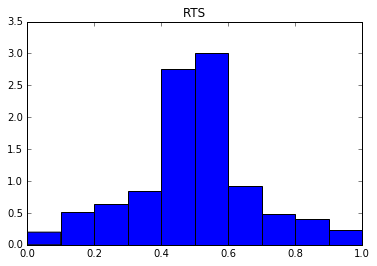

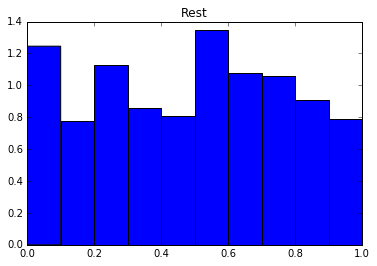

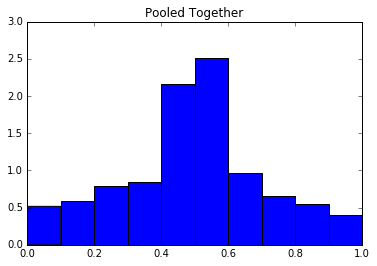

In [298]:
ratio_rts = calculate_ratio(rts)
plot_np_hist(ratio_rts, 'RTS', True)

ratio_rest = calculate_ratio(rest)
plot_np_hist(ratio_rest, 'Rest', True)

ratio_pool = calculate_ratio(pool)
plot_np_hist(ratio_pool, 'Pooled Together', True)

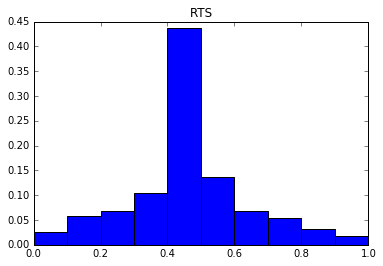

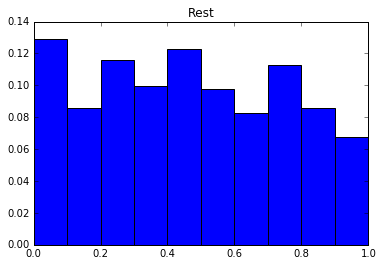

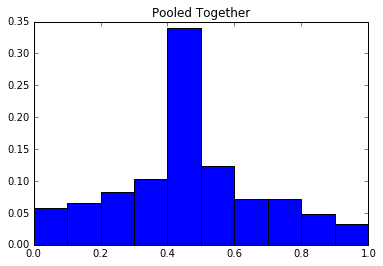

In [299]:
# plt.subplot(2,2,1)
hist_ratio = calculate_my_histogram(ratio_rts)
plot_my_histogram(hist_ratio, 'RTS', show=True)
# plt.subplot(2,2,2)
hist_rest =  calculate_my_histogram(ratio_rest)
plot_my_histogram(hist_rest, 'Rest', show=True)
# plt.subplot(2,2,3)
hist_pool = calculate_my_histogram(ratio_pool)
plot_my_histogram(hist_pool, 'Pooled Together', show=True)
plt.show()

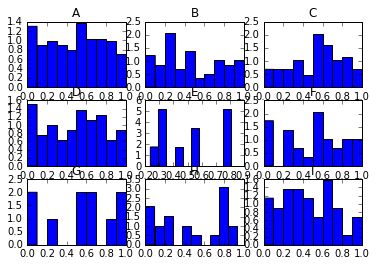

In [300]:
def my_fun(df):
    a = df.values
    a.sort(axis=1)
    return a[:,0:3]

rest_no_nan = rest_df.dropna(axis=0)
df = rest_no_nan.groupby("62 experiments").apply(my_fun)
names = df.index

ratios = {}
for j in range(df.shape[0]):
    ratios[j]= calculate_ratio(df[j])
    plt.subplot(3,3, j+1)
    plot_np_hist(ratios[j], names[j])
plt.show()

In [257]:
5%4

1